<a href="https://colab.research.google.com/github/dineshreddy221/Deep-Learning/blob/main/Creditcard_ANN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ CreditCard\ Prediction $$

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ! pip install tensorflow

In [4]:
# ! pip install keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Steps to Perform the Model:
<ol>1.Load the dataset</ol> 
<ol>2.Preprocessing.</ol>
    <li>Print the first 5 rows of the dataset</li>
    <li>Check the features in the dataset</li>
    <li>Check the missing values </li>
    <li>Check the numerical features in the dataset </li>
    <li>Check the distribution of categorical columns </li>
<ol>3.Seperate features and Labels</ol>
<ol>4.Split the dataset to train and test</ol> 
<ol>5.Do normalisation if required</ol> 
<ol>6.Model Building (ANN) </ol>
<ol>7.Compile the model</ol>
<ol>8.Make predictions</ol> 
<ol>9.Find Accuracy score</ol>
<ol>10. Build the ANN models with increasing 2 dense layers to each model and compare the accuracy scores (Minimum 5 models Required)</ol>
<ol>11. Visualize train and validation Accuracy and Losses for every model.</ol>


In [6]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Seperate features and Labels

In [8]:
inputs = df.drop("Class",axis=1)
target = df['Class']

In [9]:
inputs.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Split the dataset to train and test

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, train_size = 0.70, random_state=0)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


### Normalisation is required

In [12]:
# Amount and Time column is in different dimensions

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.659296,0.947594,0.742974,0.767015,0.204891,0.576575,0.532272,0.502833,0.792176,0.463372,...,0.373951,0.560472,0.510278,0.669169,0.051986,0.527966,0.478826,0.658794,0.343297,0.002436
1,0.783132,0.993391,0.741886,0.746948,0.254769,0.560629,0.488531,0.499437,0.782550,0.476012,...,0.373579,0.556170,0.473264,0.669410,0.421998,0.570285,0.456546,0.648003,0.339438,0.000101
2,0.726295,0.948515,0.743667,0.818653,0.280458,0.555696,0.518814,0.515140,0.773601,0.489094,...,0.375784,0.561727,0.559651,0.659332,0.517914,0.568267,0.320261,0.615360,0.307913,0.008654
3,0.193990,0.977700,0.735456,0.795014,0.221352,0.537774,0.477570,0.489833,0.785035,0.440234,...,0.373886,0.561241,0.501616,0.668079,0.463134,0.586428,0.355138,0.650365,0.341588,0.000303
4,0.840039,0.919309,0.749305,0.796413,0.224416,0.563756,0.484713,0.508397,0.784340,0.460622,...,0.373781,0.557908,0.491690,0.662241,0.498299,0.616048,0.509000,0.651842,0.345408,0.004576


In [13]:
X_train.shape

(199364, 30)

In [14]:
# Amount and Time column is in different dimensions

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.728181,0.952801,0.832724,0.921238,0.225013,0.774197,0.262097,0.197401,0.729192,0.496262,...,0.590446,0.496373,0.542211,0.607234,0.375948,0.613391,0.426804,0.239147,0.316394,0.001557
1,0.909988,0.952352,0.831314,0.924889,0.222803,0.773591,0.255646,0.196399,0.729956,0.489467,...,0.587391,0.494949,0.518327,0.611546,0.448266,0.570952,0.447394,0.238382,0.316687,0.000077
2,0.882417,0.930862,0.793623,0.928385,0.281432,0.781666,0.245170,0.181957,0.735710,0.553768,...,0.592967,0.516452,0.636015,0.630106,0.468606,0.474746,0.255384,0.243441,0.321998,0.003737
3,0.294737,0.916209,0.830502,0.949674,0.298521,0.753218,0.283916,0.193045,0.727484,0.491674,...,0.577768,0.518861,0.609565,0.614911,0.347095,0.599183,0.396397,0.224208,0.299720,0.011989
4,0.115164,0.981039,0.814610,0.936231,0.242515,0.758244,0.257734,0.184226,0.730063,0.558752,...,0.587064,0.497868,0.563693,0.613362,0.427122,0.624929,0.381556,0.236460,0.313190,0.000195


In [15]:
X_test.shape

(85443, 30)

### Model Building (ANN)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

* relu activation with adam optimizer.

In [17]:
model=Sequential()
model.add(Dense(units=12,kernel_initializer='uniform',activation='relu',input_dim=30)) # input layer
model.add(Dense(units=12,kernel_initializer='uniform',activation='relu'))  # hidden layer

model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))  # output layer

### Compile the model

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [19]:
model.fit(X_train,y_train,epochs=30,batch_size=15,verbose=0)

* Find Accuracy score

In [20]:
loss,accuracy=model.evaluate(X_train, y_train, batch_size=30)

6646/6646 [==============================] - 9s 1ms/step - loss: 0.0030 - accuracy: 0.9994


In [21]:
print("Loss: {:.4f}".format(loss))
print("Acc : {:.4f}".format(accuracy))

Loss: 0.003042155411094427
Acc 0.9994081258773804


In [22]:
y_pred=model.predict(X_test)
y_pred = y_pred>0.4
y_pred

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

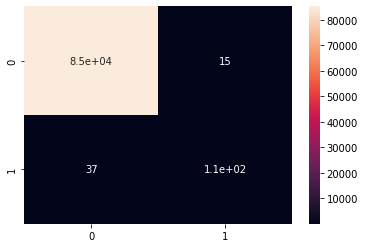

In [24]:
sns.heatmap(pd.DataFrame(cm),annot=True)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.75      0.81       147

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



Model 2

* PReLU activation with adadelta optimizer

In [28]:
# changing the neurons to 20 and checking the model.
model=Sequential()
model.add(Dense(units=20,kernel_initializer='uniform',activation='PReLU',input_dim=30)) # input layer
model.add(Dense(units=20,kernel_initializer='uniform',activation='PReLU'))  # hidden layer

model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))  # output layer

In [29]:
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics='accuracy')

In [30]:
model.fit(X_train,y_train,epochs=90,batch_size=60,verbose=0)

In [31]:
loss,accuracy=model.evaluate(X_train, y_train, batch_size=30)

6646/6646 [==============================] - 10s 1ms/step - loss: 0.0118 - accuracy: 0.9983


In [32]:
print("Loss: {:.4f}".format(loss))
print("Acc : {:.4f}".format(accuracy))

Loss: 0.01176801323890686
Acc 0.9982694983482361


In [33]:
y_pred=model.predict(X_test)
y_pred = y_pred>0.4

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

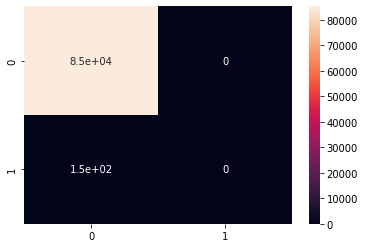

In [37]:
sns.heatmap(pd.DataFrame(cm),annot=True)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.00      0.00      0.00       147

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



Model 3

* LeakyReLU activation with adamax optimizer

In [39]:
# changing the neurons to 50 and activation to LeakyReLU, checking the model.
model=Sequential()
model.add(Dense(units=50,kernel_initializer='uniform',activation='LeakyReLU',input_dim=30)) # input layer
model.add(Dense(units=50,kernel_initializer='uniform',activation='LeakyReLU'))  # hidden layer

model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))  # output layer

In [40]:
model.compile(optimizer='adamax',loss='binary_crossentropy',metrics='accuracy')

In [41]:
model.fit(X_train,y_train,epochs=120,batch_size=90,verbose=0)

In [42]:
loss,accuracy=model.evaluate(X_train, y_train, batch_size=30)

6646/6646 [==============================] - 9s 1ms/step - loss: 0.0028 - accuracy: 0.9995


In [43]:
print("Loss: {:.4f}".format(loss))
print("Acc : {:.4f}".format(accuracy))

Loss: 0.002846894320100546
Acc 0.9994683265686035


In [44]:
# the prediction here is we are getting loss in continues.
y_pred=model.predict(X_test)
y_pred = y_pred>0.4  # if we dont take predicted values greater than 0 it encounters to error.

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, y_pred)

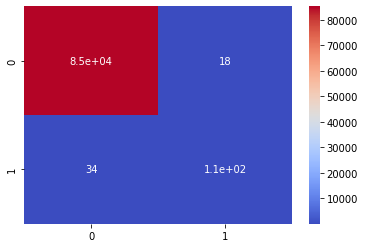

In [46]:
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'coolwarm')

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.77      0.81       147

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Model 4

* ELU activation with SGD optimizer

In [48]:
# Activation of these model is ELU and neurons changed to 60
model = Sequential()
# input layer
model.add(Dense(units = 60, kernel_initializer= "uniform",activation= "ELU", input_dim =30))
# hidden layer
model.add(Dense(units= 60, kernel_initializer= "uniform", activation= "ELU"))

# output layer
model.add(Dense(units= 1, kernel_initializer="uniform", activation="sigmoid"))

In [49]:
# compiling the model with stokastic gradient descent
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics="accuracy")

In [50]:
model.fit(X_train, y_train, epochs=150, batch_size=100, verbose=0)

In [51]:
loss, accuracy = model.evaluate(X_train, y_train,  batch_size=30)

6646/6646 [==============================] - 9s 1ms/step - loss: 0.0040 - accuracy: 0.9992


In [73]:
print("Loss :{:.4f}".format(loss))
print("Acc :{:.4f}".format(accuracy))

Loss :0.0031
Acc :0.9994


In [53]:
y_pred = model.predict(X_test)
y_pred = y_pred>0.4

In [54]:
cm = confusion_matrix(y_test, y_pred)

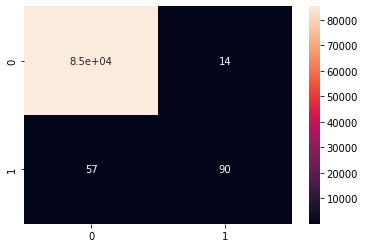

In [55]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.61      0.72       147

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Model 5

* Softmax activation with Nadam optimizer.

In [57]:
# Activation of these model is Softmax and neurons changed to 60
model = Sequential()
# input layer
model.add(Dense(units = 80, kernel_initializer= "uniform",activation= "softmax", input_dim =30))
# hidden layer
model.add(Dense(units= 80, kernel_initializer= "uniform", activation= "softmax"))

# output layer
model.add(Dense(units= 1, kernel_initializer="uniform", activation="sigmoid"))

In [58]:
# compiling the model with Nadam
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics="accuracy")

In [59]:
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=0)

In [60]:
loss, accuracy = model.evaluate(X_train, y_train,  batch_size=30)

6646/6646 [==============================] - 9s 1ms/step - loss: 0.0031 - accuracy: 0.9994


In [74]:
print("Loss : {:.4f}".format(loss))
print("Acc :{:.4f}".format(accuracy))

Loss : 0.0031
Acc :0.9994


In [62]:
y_pred = model.predict(X_test)
y_pred = y_pred>0.4

In [63]:
cm = confusion_matrix(y_test, y_pred)

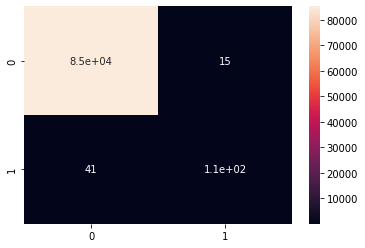

In [64]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.72      0.79       147

    accuracy                           1.00     85443
   macro avg       0.94      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443

